In [2]:
import netCDF4 as nc
import numpy as np
import datetime
import xarray as xr
import pyart
import wradlib as wrl
from matplotlib import pyplot as plt
import pandas as pd

file = '/home/jovyan/work/project_0/pre_acum30_sri.nc'
#file = '/home/jovyan/work/project_0/dpsri_event1.nc'  #working 
#file = '/shared_space/project_0/radar/pro/precip.nc'
fp = xr.open_dataset(file)
totaltime = len(fp['time'])
totallon = len(fp['lat'])
totallat = len(fp['lon'])
data = np.array(fp['precip'][:,:,:]/6)
times = np.array(fp['time'][:])
print('total time:  ', totaltime)
#(fp['precip'][0,:,:]/6).plot()

file = '/home/jovyan/work/project_0/est_jun.csv'
X = pd.read_csv(file, sep= ';')
X.head()

code = np.array(X['Stationcode'])
lat = np.array(X['Lat'])
lon = np.array(X['Lon'])

nsta = len(code)
print(nsta)

radar30_sri=np.zeros([totaltime,nsta])
i=0
while i <= (totaltime-1):
    j=0
    while j <= (nsta-1):
        radar30_sri[i,j]=np.array(fp['precip'][i,:,:].sel(lat=lat[j],lon=lon[j],method='nearest'))
        j=j+1
    i=i+1

OSError: [Errno -101] NetCDF: HDF error: b'/home/jovyan/work/project_0/pre_acum30_sri.nc'

total time:   5
station numbers   283


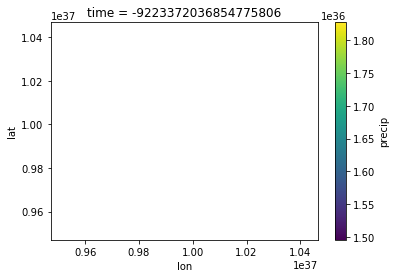

In [5]:
import netCDF4 as nc
import numpy as np
import datetime
import xarray as xr
import pyart
import wradlib as wrl
from matplotlib import pyplot as plt
import pandas as pd

file = '/home/jovyan/work/project_0/pre_acum30_dsri.nc'
#file = '/home/jovyan/work/project_0/dpsri_event1.nc'  #working 
#file = '/shared_space/project_0/radar/pro/precip.nc'
fp = xr.open_dataset(file)
totaltime = len(fp['time'])
totallon = len(fp['lat'])
totallat = len(fp['lon'])
data = np.array(fp['precip'][:,:,:]/6)
times = np.array(fp['time'][:])
print('total time:  ', totaltime)
(fp['precip'][0,:,:]/6).plot()

file = '/home/jovyan/work/project_0/est_jun.csv'
X = pd.read_csv(file, sep= ';')
X.head()

code = np.array(X['Stationcode'])
lat = np.array(X['Lat'])
lon = np.array(X['Lon'])

nsta = len(code)
print('station numbers  ',nsta)

#radar30_dpsri=np.zeros([totaltime,nsta])
#i=0
#while i <= (totaltime-1):
  #  j=0
   # while j <= (nsta-1):
      #  radar30_dpsri[i,j]=np.array(fp['precip'][i,:,:].sel(lat=lat[j],lon=lon[j],method='nearest'))
      #  j=j+1
   # i=i+1

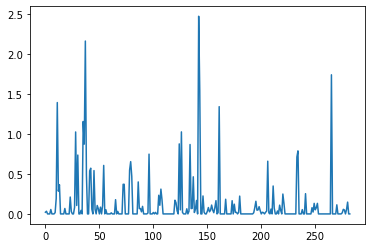

In [24]:
plt.plot(radar30_dpsri[1,:])
plt.plot(radar30_sri[1,:])
plt.show()

In [3]:
plt.plot(radar30_dpsri[1,:])
plt.show()

NameError: name 'radar30_dpsri' is not defined

In [3]:
file = '/home/jovyan/work/project_0/accum30_june.csv'
X = pd.read_csv(file, sep= ',')
X.head()

,Unnamed: 0,City,Stationcode,State,Stationname,Latitude,Longtitude,Datehour,Value
0,0,ABREU E LIMA,260005401A,PE,Distrito Industrial - Timbó,-34.898,-7.917,2019-06-01 00:10:00.0.0,0.0
1,1,ABREU E LIMA,260005401A,PE,Distrito Industrial - Timbó,-34.898,-7.917,2019-06-01 00:40:00.0.0,0.0
2,2,ABREU E LIMA,260005401A,PE,Distrito Industrial - Timbó,-34.898,-7.917,2019-06-01 01:10:00.0.0,0.0
3,3,ABREU E LIMA,260005401A,PE,Distrito Industrial - Timbó,-34.898,-7.917,2019-06-01 01:40:00.0.0,0.0
4,4,ABREU E LIMA,260005401A,PE,Distrito Industrial - Timbó,-34.898,-7.917,2019-06-01 02:10:00.0.0,0.0


In [5]:
nlin=1440 # i saw the number of observations for each station, 
#as it is all at the same time we have 1440 observation in each station for this 3 days .csv
code2 = np.array(X['Stationcode'])
date = np.array(X['Datehour'])
nlin2 = len(code2)
value = np.array(X['Value'])
### 1 is date and 2 is the value 
gauge30=np.zeros([nlin,nsta,2])

date2=[]
i=0
while i <= nlin2-1:
    tmp = date[i][0:4] + date[i][5:7] + date[i][8:10] + date[i][11:13] + date[i][14:16]
    date2.append(tmp)
    #print(tmp,'  ',i)
    i=i+1
    
#print(date2[1:10])

['201906010040', '201906010110', '201906010140', '201906010210', '201906010240', '201906010310', '201906010340', '201906010410', '201906010440']


In [52]:
#print(date2[1:10])
j=0
i=0
k=0
while i <= nlin2-1:    
    if code[j] == code2[i]:
        gauge30[k,j,0]=int(date2[i])
        gauge30[k,j,1]=value[i]
        i=i+1
        k=k+1
    else:
        k=0
        j=j+1
        gauge30[k,j,0]=int(date2[i])
        gauge30[k,j,1]=value[i]
        #print('i  ', i,'k  ', k,'j  ',j,'date ',int(date2[i]),'p  ',value[i],gauge30[k,j,0])
        #i=i+1

201906010010


In [34]:
print(code2[1439:1442])
print(date2[1439:1442])

['260005401A' '260005402A' '260005402A']
['201906302340', '201906010010', '201906010040']
